In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

Once again, we make use of the Pokémon data for this exercise.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

In [3]:
pokemon['height'].describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

- Make `countplot()` (**seaborn**) vs. `plt. hist()` (**matplotlib**) plots and compare them.

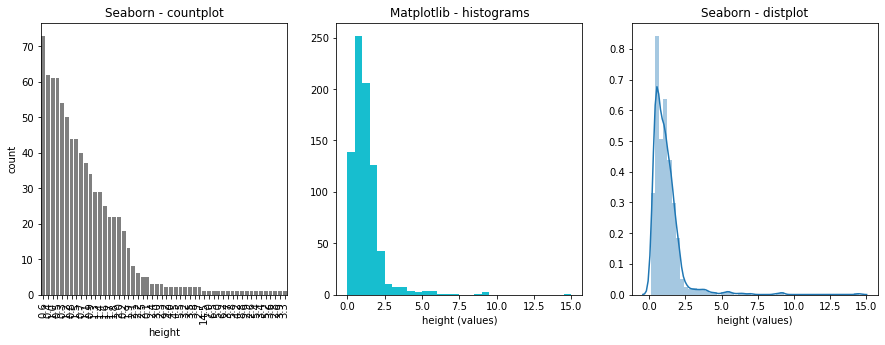

In [4]:
# create a larege figure
plt.figure(figsize = [15, 5])

# make a left subplot 1
plt.subplot(1,3,1)
sb_color = sb.color_palette()[7]
order_height = pokemon.height.value_counts().index
sb.countplot(data = pokemon, x = 'height', color = sb_color, order = order_height)
plt.xticks(rotation=90) # rotate the axis labels for 90
plt.title('Seaborn - countplot')

# make a right subplot 2
plt.subplot(1,3,2)
sb_color = sb.color_palette()[9]
bin_edges = np.arange(0, pokemon['height'].max()+1, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges, color =sb_color)
plt.xlabel('height (values)')
plt.title('Matplotlib - histograms')

# make a right subplot 3
plt.subplot(1,3,3)
sb.distplot(pokemon['height'])
plt.title('Seaborn - distplot')
plt.xlabel('height (values)');

- Zoom out the selected x-axis by `plt.xlim()` function

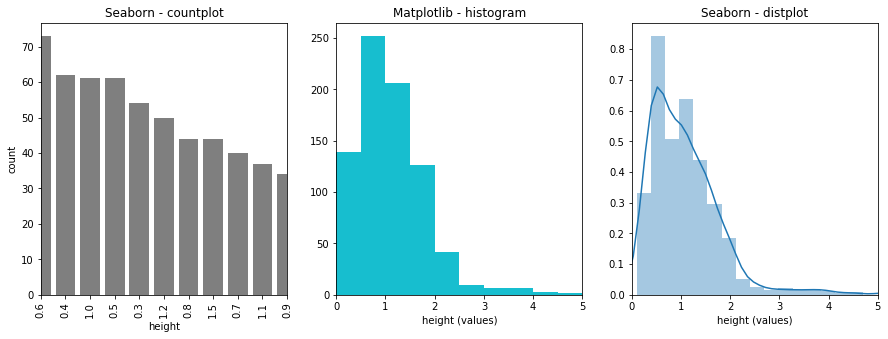

In [5]:
# create a larege figure
plt.figure(figsize = [15, 5])

# make a left subplot 1
plt.subplot(1,3,1)
sb_color = sb.color_palette()[7]
order_height = pokemon.height.value_counts().index
sb.countplot(data = pokemon, x = 'height', color = sb_color, order = order_height)
plt.xticks(rotation=90)
plt.title('Seaborn - countplot')
plt.xlim(0, 10)

# make a central subplot 2
plt.subplot(1,3,2)
sb_color = sb.color_palette()[9]
bin_edges = np.arange(0, pokemon['height'].max()+1, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges, color =sb_color)
plt.xlabel('height (values)')
plt.title('Matplotlib - histogram')
plt.xlim(0, 5);

# make a right subplot 3
plt.subplot(1,3,3)
sb.distplot(pokemon['height'])
plt.title('Seaborn - distplot')
plt.xlabel('height (values)')
plt.xlim(0, 5);

- Transform the selected variable `height` with ```plt.xscale(`log`)```

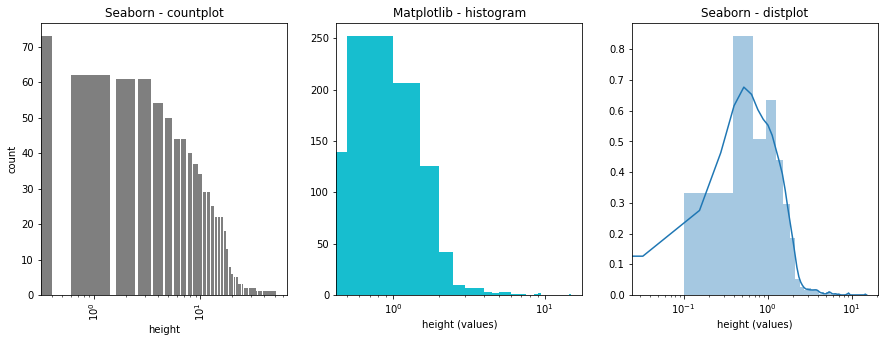

In [6]:
# create a larege figure
plt.figure(figsize = [15, 5])

# make a left subplot 1
plt.subplot(1,3,1)
sb_color = sb.color_palette()[7]
order_height = pokemon.height.value_counts().index
sb.countplot(data = pokemon, x = 'height', color = sb_color, order = order_height)
plt.xticks(rotation=90)
plt.title('Seaborn - countplot')
plt.xscale('log')

# make a central subplot 2
plt.subplot(1,3,2)
sb_color = sb.color_palette()[9]
bin_edges = np.arange(0, pokemon['height'].max()+1, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges, color =sb_color)
plt.xlabel('height (values)')
plt.title('Matplotlib - histogram')
plt.xscale('log');

# make a right subplot 3
plt.subplot(1,3,3)
sb.distplot(pokemon['height'])
plt.title('Seaborn - distplot')
plt.xlabel('height (values)')
plt.xscale('log');

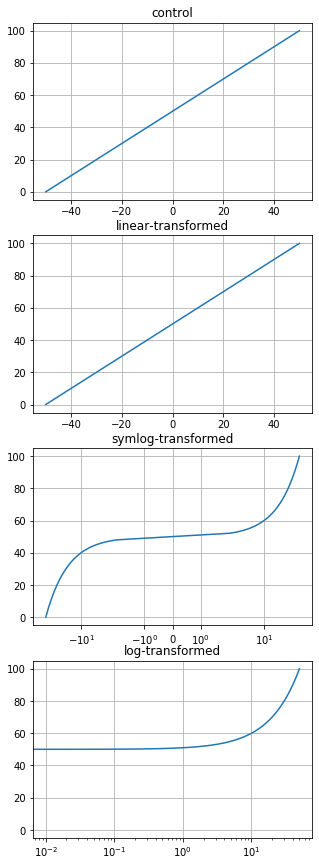

In [7]:
plt.figure(figsize =[5, 15])

dt = 0.01
x = np.arange(-50.0, 50.0, dt)
y = np.arange(0, 100.0, dt)

plt.subplot(4,1,1)
plt.plot(x, y)
plt.grid(True)
plt.title('control')

# xcale with log
plt.subplot(4,1,2)
plt.plot(x, y)
plt.xscale('linear')
plt.grid(True)
plt.title('linear-transformed')

# xcale with symlog
plt.subplot(4,1,3)
plt.plot(x, y)
plt.xscale('symlog')
plt.grid(True)
plt.title('symlog-transformed')

# xcale with log
plt.subplot(4,1,4)
plt.plot(x, y)
plt.xscale('log')
plt.grid(True)
plt.title('log-transformed');

#### Two issues from the above two plots:
- Bin size issue: size from wide on the left to thin on the right, as the values increase multiplicatively.
- Labels are diffcult to be interpreted, and are sparse as well.<br>
#### Solutions:
- reset bin size with `xticks()` function to specify locations and labels


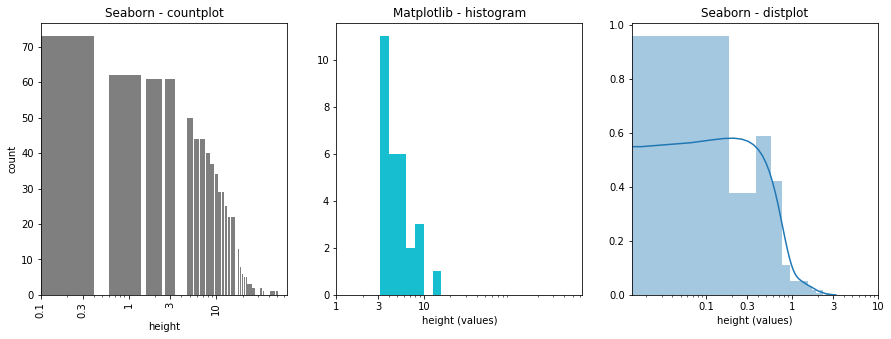

In [8]:
# create a larege figure
plt.figure(figsize = [15, 5])

# make a left subplot 1
plt.subplot(1,3,1)
sb_color = sb.color_palette()[7]
order_height = 10 ** np.log10(pokemon.height.value_counts().index)
sb.countplot(data = pokemon, x = 'height', color = sb_color, order = order_height)
plt.xticks(rotation=90)
plt.title('Seaborn - countplot')
plt.xscale('log')
tick_locs = [0.1, 0.3, 1, 3, 10]
plt.xticks(tick_locs, tick_locs)

# make a central subplot 2
plt.subplot(1,3,2)
sb_color = sb.color_palette()[9]
bin_edges = 10**np.arange(0.5, np.log(pokemon['height'].max()+1), 0.1)
plt.hist(data = pokemon, x = 'height', bins = bin_edges, color =sb_color)
plt.xlabel('height (values)')
plt.title('Matplotlib - histogram')
plt.xscale('log')
tick_locs = [1, 3, 10]
plt.xticks(tick_locs, tick_locs)

# make a right subplot 3
plt.subplot(1,3,3)
sb.distplot(np.log(pokemon['height']))
plt.title('Seaborn - distplot')
plt.xlabel('height (values)')
plt.xscale('log')
tick_locs = [0.1, 0.3, 1, 3, 10]
plt.xticks(tick_locs, tick_locs);

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


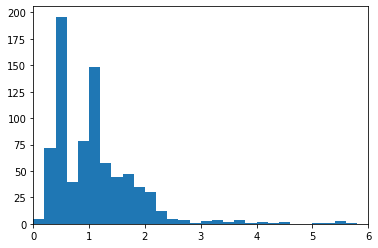

In [9]:
# run this cell to check your work against ours
scales_solution_1()

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

#### Create countplot, histogram and distplot with `weight` variable

In [10]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

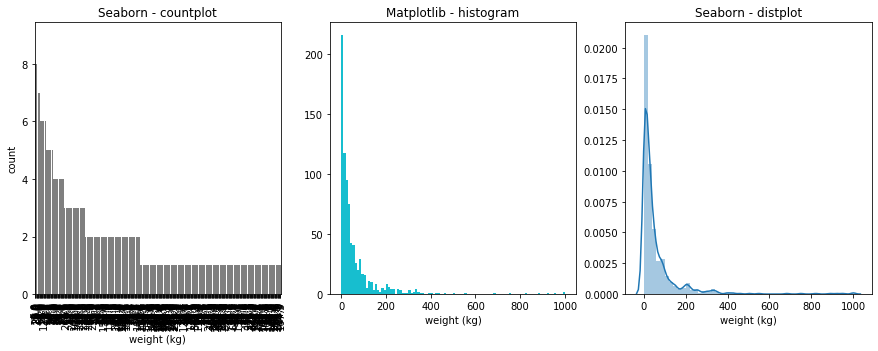

In [11]:
# make three subplot in a figure
plt.figure(figsize = [15, 5])

# subplot 1 with countplot
plt.subplot(1, 3, 1)
sb_color = sb.color_palette()[7]
order_weight = pokemon.weight.value_counts().index
sb.countplot(data = pokemon, x = 'weight', order = order_weight, color = sb_color)
plt.xlabel('weight (kg)')
plt.title('Seaborn - countplot')
plt.xticks(rotation = 90)

# subplot 2 with histogram
plt.subplot(1, 3, 2)
sb_color = sb.color_palette()[9]
bin_edges = np.arange(0, pokemon['weight'].max()+1, 10)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges, color =sb_color)
plt.xlabel('weight (kg)')
plt.title('Matplotlib - histogram')

# subplot 3 with distplot
plt.subplot(1, 3, 3)
sb.distplot(pokemon['weight'])
plt.xlabel('weight (kg)')
plt.title('Seaborn - distplot');

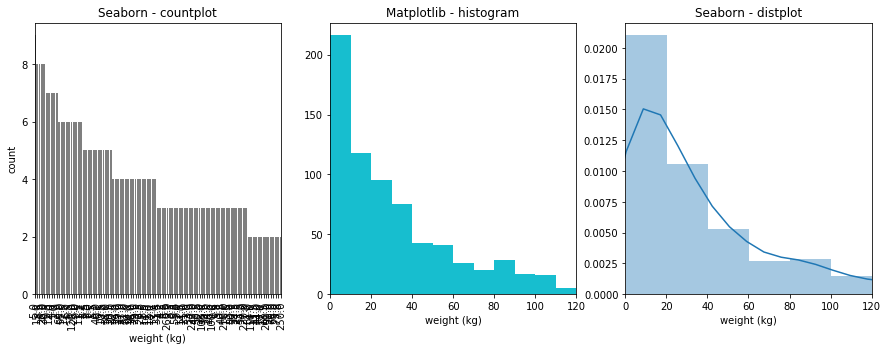

In [12]:
# xlim axis range 0, 120

# make three subplot in a figure
plt.figure(figsize = [15, 5])

# subplot 1 with countplot
plt.subplot(1, 3, 1)
sb_color = sb.color_palette()[7]
order_weight = pokemon.weight.value_counts().index
sb.countplot(data = pokemon, x = 'weight', order = order_weight, color = sb_color)
plt.xlabel('weight (kg)')
plt.title('Seaborn - countplot')
plt.xticks(rotation = 90)
plt.xlim(0, 100)

# subplot 2 with histogram
plt.subplot(1, 3, 2)
sb_color = sb.color_palette()[9]
bin_edges = np.arange(0, pokemon['weight'].max()+1, 10)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges, color =sb_color)
plt.xlabel('weight (kg)')
plt.title('Matplotlib - histogram')
plt.xlim(0, 120)

# subplot 3 with distplot
plt.subplot(1, 3, 3)
sb.distplot(pokemon['weight'])
plt.xlabel('weight (kg)')
plt.title('Seaborn - distplot')
plt.xlim(0, 120);

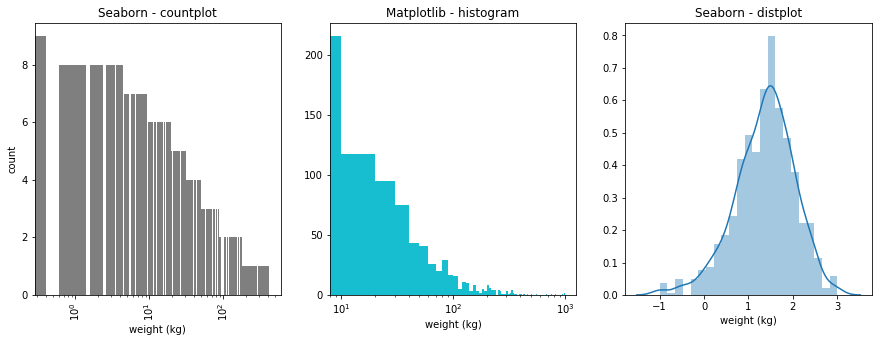

In [13]:
# log transform weight xscale('log')

# make three subplot in a figure
plt.figure(figsize = [15, 5])

# subplot 1 with countplot
plt.subplot(1, 3, 1)
sb_color = sb.color_palette()[7]
order_weight = pokemon.weight.value_counts().index
sb.countplot(data = pokemon, x = 'weight', order = order_weight, color = sb_color)
plt.xlabel('weight (kg)')
plt.title('Seaborn - countplot')
plt.xticks(rotation = 90)
plt.xscale('log')

# subplot 2 with histogram
plt.subplot(1, 3, 2)
sb_color = sb.color_palette()[9]
bin_edges = np.arange(0, pokemon['weight'].max()+1, 10)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges, color =sb_color)
plt.xlabel('weight (kg)')
plt.title('Matplotlib - histogram')
plt.xscale('log')

# subplot 3 with distplot
plt.subplot(1, 3, 3)
sb.distplot(np.log10(pokemon['weight']))
plt.xlabel('weight (kg)')
plt.title('Seaborn - distplot');

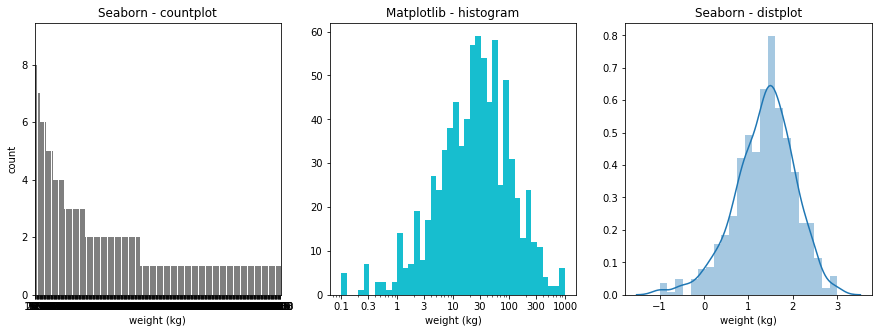

In [14]:
# fix the x-axis ticks with xticks

# make three subplot in a figure
plt.figure(figsize = [15, 5])

# subplot 1 with countplot
plt.subplot(1, 3, 1)
sb_color = sb.color_palette()[7]
order_weight = pokemon.weight.value_counts().index
sb.countplot(data = pokemon, x = 'weight', order = order_weight, color = sb_color)
plt.xlabel('weight (kg)')
plt.title('Seaborn - countplot')


# subplot 2 with histogram
plt.subplot(1, 3, 2)
sb_color = sb.color_palette()[9]
bin_edges = 10** np.arange(-1, np.log10(pokemon['weight'].max())+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bin_edges, color = sb_color)
plt.xlabel('weight (kg)')
plt.title('Matplotlib - histogram')
plt.xscale('log')
plt.xticks(ticks, labels)

# subplot 3 with distplot
plt.subplot(1, 3, 3)
sb.distplot(np.log10(pokemon['weight']))
plt.xlabel('weight (kg)')
plt.title('Seaborn - distplot');

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


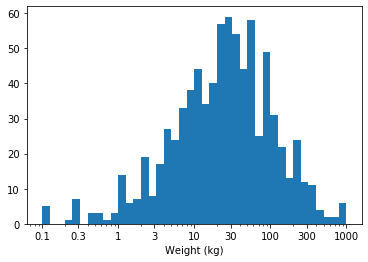

In [15]:
# run this cell to check your work against ours
scales_solution_2()